# Geospatial Data Science - EEPS 440/460

# Lecture 10

# Map Projections I

Map projections allow us to represent the curved surface of the Earth on a flat plane. In this lecture, we will explore different types of projections, their properties, and the trade-offs involved in choosing the right projection for a given application.

## Learning Objectives

- Understand why map projections are necessary
- Learn the fundamental properties of map projections
- Explore common types of map projections
- Identify distortions associated with different projections
- Gain familiarity with projection selection for various applications
- Apply map projections in real-world scenarios

## Reading Material
[*Short History on Map Projections*](https://link.springer.com/chapter/10.1007/978-3-319-51835-0_11)

___
# Let's start off with some motivation

# Data to use: GMTED2010

Griddded global elevation dataset at a 30 arcsec spatial resolution. There are better and finer resolution elevation data out there but we will use GMTED2010 for now as an example. I have upscaled the dataset to 0.1 arcdegree spatial resolution for this presentation.

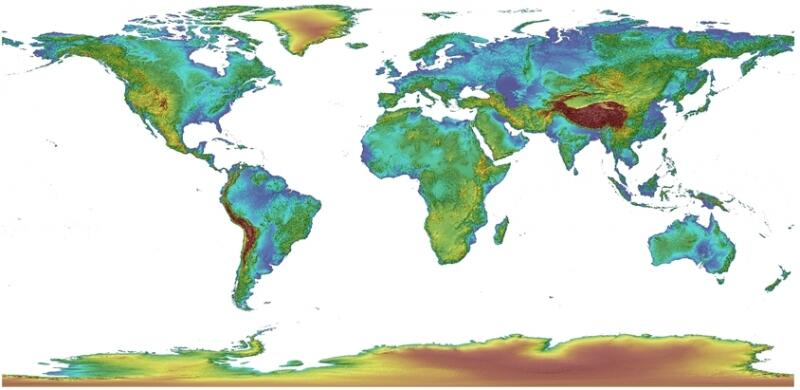


Let's plot the data on a regular lat/lon grid

In [ ]:
import rasterio
import numpy as np
file =  '../data/GMTED2010/mn450.tif'
fp = rasterio.open(file,'r')
dem = fp.read(1)
#Set no data to sea level
dem[dem == fp.nodata] = 0.0

In [ ]:
#Let's plot the data
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
plt.imshow(dem,cmap=plt.get_cmap('terrain'))
plt.xticks([])
plt.yticks([])
cb = plt.colorbar(orientation='horizontal',shrink=0.6,pad=0.03)
cb.ax.tick_params(labelsize=20)
plt.title('Elevation (m)',fontsize=25)
plt.show()

Pretty map but nothing new...

## Let's now introduce cartopy

Cartopy is a Python package designed for geospatial data processing in order to produce maps and other geospatial data analyses.

Cartopy makes use of the powerful geospatial libraries and includes a programmatic interface built on top of Matplotlib for the creation of publication quality maps.

Key features of cartopy are its object oriented projection definitions, and its ability to transform points, lines, vectors, polygons and images between those projections.

You will find cartopy especially useful for large area / small scale data, where Cartesian assumptions of spherical data traditionally break down.
If you’ve ever experienced a singularity at the pole or a cut-off at the dateline, it is likely you will appreciate cartopy’s unique features!

In [ ]:
%%html
<iframe width="939" height="528" src="https://scitools.org.uk/cartopy/docs/latest/reference/index.html" frameborder="0" allow="accelerometer;  autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe> 

In [ ]:
import cartopy
img_extent = (-180,180,-90,90)
fig = plt.figure(figsize=(14,6))
#define the axes with a corresponding projection
ax = plt.axes(projection=cartopy.crs.PlateCarree())
#d
plt.imshow(dem,transform=cartopy.crs.PlateCarree(),cmap=plt.get_cmap('terrain'),extent=(img_extent))
plt.xticks([])
plt.yticks([])
cb = plt.colorbar(ax=ax,orientation='horizontal',shrink=0.6,pad=0.03)
cb.ax.tick_params(labelsize=20)
plt.title('Elevation (m)',fontsize=25)
plt.show()

That is the exact same plot... Are we making any progress?

More than it might seem at first. Hello map projections!

In [ ]:
%%HTML
<iframe width="939" height="528" src="https://scitools.org.uk/cartopy/docs/latest/reference/projections.html" frameborder="0" allow="accelerometer;  autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe> 

Let's try out the Robinson projection

In [ ]:
img_extent = (-180,180,-90,90)
fig = plt.figure(figsize=(14,6))
#Target projection
ax = plt.axes(projection=cartopy.crs.Robinson())
#Source projection
plt.imshow(dem,transform=cartopy.crs.PlateCarree(),cmap=plt.get_cmap('terrain'),extent=(img_extent))
plt.xticks([])
plt.yticks([])
cb = plt.colorbar(ax=ax,orientation='horizontal',shrink=0.6,pad=0.03)
cb.ax.tick_params(labelsize=20)
plt.title('Elevation (m)',fontsize=25)
plt.show()

Progress!

Things get fun quickly.

In [ ]:
import cartopy.feature
import cartopy.io.shapereader
img_extent = (-180,180,-90,90)
fig = plt.figure(figsize=(14,6))
#Target projection
ax = plt.axes(projection=cartopy.crs.Robinson())
#Let's mask out sea level elevation
dem = np.ma.masked_array(dem,dem==0)
#Source projection
plt.imshow(dem,transform=cartopy.crs.PlateCarree(),cmap=plt.get_cmap('terrain'),extent=(img_extent))
plt.xticks([])
plt.yticks([])
#Let's add country borders, coastlines, major riverrs, and lakes
ax.add_feature(cartopy.feature.ShapelyFeature(cartopy.io.shapereader.Reader( '../data/MISC/ne_10m_coastline.shp').geometries(),
                                              cartopy.crs.PlateCarree(),facecolor='None',edgecolor='black'))
ax.add_feature(cartopy.feature.ShapelyFeature(cartopy.io.shapereader.Reader( '../data/MISC/ne_10m_admin_0_countries.shp').geometries(),
                                              cartopy.crs.PlateCarree(),linestyle=':',facecolor='None',edgecolor='black'))
ax.add_feature(cartopy.feature.ShapelyFeature(cartopy.io.shapereader.Reader( '../data/MISC/ne_10m_ocean.shp').geometries(),
                                              cartopy.crs.PlateCarree(),color='gray',alpha=0.2))
#Let's add a colorbar
cb = plt.colorbar(ax=ax,orientation='horizontal',shrink=0.6,pad=0.03)
cb.ax.tick_params(labelsize=20)
plt.title('Elevation (m)',fontsize=25)
plt.show()

How about a globe?

In [ ]:
img_extent = (-180,180,-90,90)
fig = plt.figure(figsize=(10,10))
#Target projection
ax = plt.axes(projection=cartopy.crs.Orthographic())
#Source projection
im = plt.imshow(dem,transform=cartopy.crs.PlateCarree(),cmap=plt.get_cmap('terrain'),extent=(img_extent))
plt.xticks([])
plt.yticks([])
#Let's add country borders, coastlines, major riverrs, and lakes
ax.add_feature(cartopy.feature.ShapelyFeature(cartopy.io.shapereader.Reader( '../data/MISC/ne_10m_coastline.shp').geometries(),
                                              cartopy.crs.PlateCarree(),facecolor='None',edgecolor='black'))
ax.add_feature(cartopy.feature.ShapelyFeature(cartopy.io.shapereader.Reader( '../data/MISC/ne_10m_admin_0_countries.shp').geometries(),
                                              cartopy.crs.PlateCarree(),linestyle=':',facecolor='None',edgecolor='black'))
ax.add_feature(cartopy.feature.ShapelyFeature(cartopy.io.shapereader.Reader( '../data/MISC/ne_10m_ocean.shp').geometries(),
                                              cartopy.crs.PlateCarree(),color='gray',alpha=0.2))
cb = plt.colorbar(ax=ax,orientation='horizontal',shrink=0.6,pad=0.03)
cb.ax.tick_params(labelsize=20)
plt.title('Elevation (m)',fontsize=25)
plt.show()

How about a rotating globe? 

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML

img_extent = (-180,180,-90,90)
fig = plt.figure(figsize=(10,10))
vmin = np.min(dem)
vmax = np.max(dem)
nframes = 5

central_lon = np.linspace(-180,180,nframes)

# animation function. This is called sequentially
def animate(i):
    #Clear figure
    plt.clf()
    #Target projection
    ax = plt.axes(projection=cartopy.crs.Orthographic(central_longitude=central_lon[i]))
    #Source projection
    im = plt.imshow(dem,vmin=vmin,vmax=vmax,
                    transform=cartopy.crs.PlateCarree(),
                    cmap=plt.get_cmap('terrain'),extent=(img_extent))
    plt.xticks([])
    plt.yticks([])
    #Let's add country borders, coastlines, major riverrs, and lakes
    ax.add_feature(cartopy.feature.ShapelyFeature(cartopy.io.shapereader.Reader( '../data/MISC/ne_10m_coastline.shp').geometries(),
                                              cartopy.crs.PlateCarree(),facecolor='None',edgecolor='black'))
    ax.add_feature(cartopy.feature.ShapelyFeature(cartopy.io.shapereader.Reader( '../data/MISC/ne_10m_admin_0_countries.shp').geometries(),
                                              cartopy.crs.PlateCarree(),linestyle=':',facecolor='None',edgecolor='black'))
    ax.add_feature(cartopy.feature.ShapelyFeature(cartopy.io.shapereader.Reader( '../data/MISC/ne_10m_ocean.shp').geometries(),
                                              cartopy.crs.PlateCarree(),color='gray',alpha=0.2))
    #Add the colorbar
    cb = plt.colorbar(ax=ax,orientation='horizontal',shrink=0.6,pad=0.03)
    cb.ax.tick_params(labelsize=20)
    cb.ax.set_xlabel('Elevation (m)',fontsize=25)
    return (im,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate,frames=nframes, interval=500, blit=False)

HTML(anim.to_html5_video())

You will be using Cartopy a lot... Now let's turn our attention to map projections (key to what is happening under the hood in Cartopy).

# Basic Geodesy

Source: Robinson et al., 1995

# Geographic Coordinates 




<img src="https://upload.wikimedia.org/wikipedia/commons/8/83/Latitude_and_longitude_graticule_on_a_sphere.svg" width="400">

## Where $\phi$ is latitude and $\lambda$ is longitude

# Parallels and Meridians -> Graticule

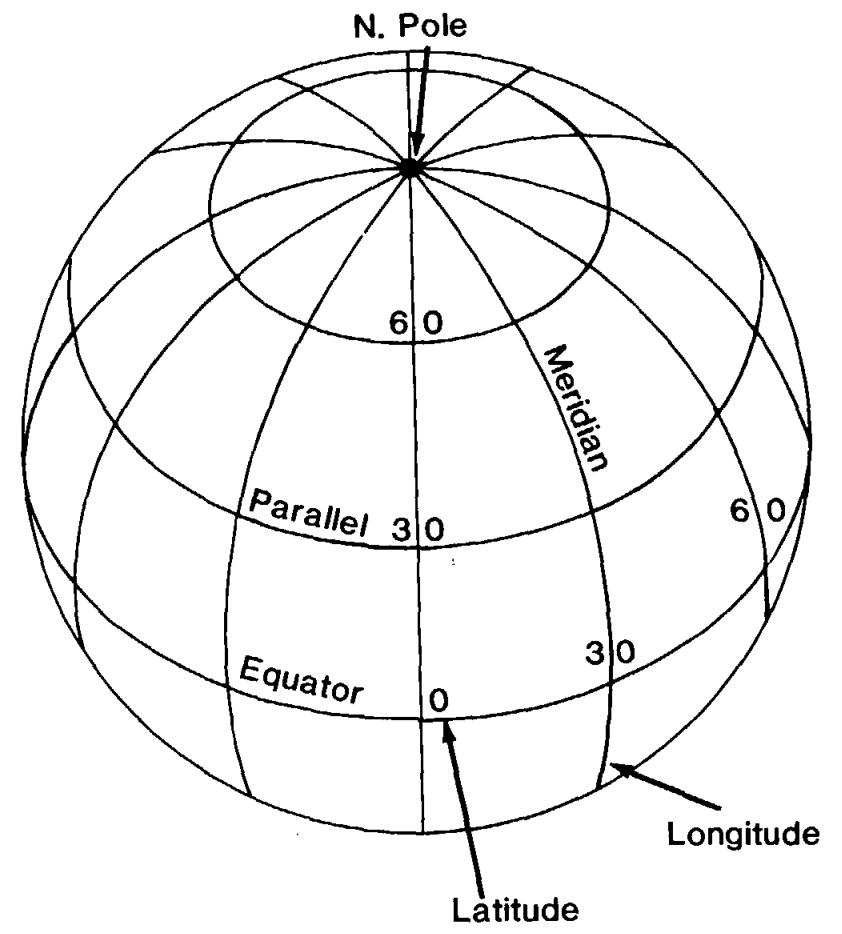

# Properties of the Graticule 

* Distance
* Direction 
* Area

# Graticule Property: Distance

- The **shortest path** between two points on a sphere is not a straight line on a flat map but an **arc** on the sphere’s surface.
- This arc is formed by the **intersection** of the sphere with a plane that passes through the **two points and the Earth's center**.
- When this intersection creates a full circle that **divides the Earth into two equal hemispheres**, it is called a **great circle**.
- Great circles are important in **navigation and aviation**, as they represent the shortest route between locations on a globe.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Illustration_of_great-circle_distance.svg/440px-Illustration_of_great-circle_distance.svg.png" width="400">

# Detour: Great Circle Distance Example

To calculate the shortest distance between two points on the Earth's surface (the **great circle distance**), we first determine the **central angle** $ \Delta \sigma $ between them:

$$
\Delta \sigma  = \arccos(\sin\phi_1\sin\phi_2 + \cos\phi_1\cos\phi_2\cos(\lambda_2 - \lambda_1))
$$

where:
- $ \lambda_1, \lambda_2 $ are the **longitudes** of the two points (in radians).
- $ \phi_1, \phi_2 $ are the **latitudes** of the two points (in radians).

Once we have $ \Delta \sigma $, the **great circle distance** $ d $ (in kilometers) is found using the Earth's mean radius $ R_e $ (approximated as **6371 km**):

$$
d = R_e \Delta \sigma
$$

This formula provides the shortest path along the Earth's surface, which is essential for **airline routes, global positioning, and navigation systems**.


In [ ]:
import numpy as np
import math

def degrees_to_radians(deg):
    return deg * (math.pi / 180)

def compute_distance(lat1,lon1,lat2,lon2):
    lat1 = degrees_to_radians(lat1)
    lon1 = degrees_to_radians(lon1)
    lat2 = degrees_to_radians(lat2)
    lon2 = degrees_to_radians(lon2)
    Re = 6371.0
    p1 = np.sin(lat1)*np.sin(lat2)
    p2 = np.cos(lat1)*np.cos(lat2)*np.cos(lon2-lon1)
    dsigma = np.arccos(p1 + p2)
    d = Re*dsigma
    return d

#Define geographic coordinates of Durham and Chicago
durham = {'lat':35.9940,'lon':-78.8986}
chicago = {'lat':41.8781,'lon':-87.6298}

#Calculate distance
d = compute_distance(durham['lat'],durham['lon'],chicago['lat'],chicago['lon'])
print(d,'km')

# Graticule Property: Direction

- **North-South direction** follows a **meridian** (longitude line).
- **East-West direction** follows a **parallel** (latitude line).
- The **azimuth** of a line on Earth is its angle measured **clockwise from true north**, defining its direction.

# Graticule Property: Area

The surface area of **quadrilateral regions** bounded by **meridians and parallels** decreases as one moves from the equator toward the poles due to the Earth's curvature. The area can be computed using:

$$
A = R_e^2\left|\sin{\phi_a}-\sin{\phi_b}\right||\lambda_c - \lambda_d|
$$

where:
- $ R_e $ = Earth's mean radius,
- $ \phi_a, \phi_b $ = latitudes of the bounding parallels (in radians),
- $ \lambda_c, \lambda_d $ = longitudes of the bounding meridians (in radians).

This formula accounts for the **spherical shape of the Earth** and is commonly used in **cartography and geospatial analysis**.


# Surface area calculation

In [ ]:
#Lets' define the function to calculate the surface area of quadrilateral on the earth's surface
def surface_area(Re,phi_a,phi_b,lambda_c,lambda_d):
    #Convert to radians
    phi_a = phi_a*np.pi/180.0
    phi_b = phi_b*np.pi/180.0
    lambda_c = lambda_c*np.pi/180.0
    lambda_d = lambda_d*np.pi/180.0
    #Calculate surface area
    return Re**2*np.abs(np.sin(phi_a)-np.sin(phi_b))*np.abs(lambda_c - lambda_d)

In [ ]:
#Let's calculate the total surface of the earth
Re = 6371.0 #km
phi_a = -90.0
phi_b = 90.0
lambda_c = -180
lambda_d = 180
area = surface_area(Re,phi_a,phi_b,lambda_c,lambda_d)
print(area,'km2')

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
#Let's calculate how the surface area changes from the south pole to the north pole
Re = 6371.0 #km
#First let's define the meridians
lambda_c = -120.0
lambda_d = -121.0
#Let's intialize an array of latitudes with a 1 arcdegree resolution
phis = np.linspace(-90,90,180)
phi_a = phis[:-1]
phi_b = phis[1:]
#Let's compute the surface area for these cases
area = surface_area(Re,phi_a,phi_b,lambda_c,lambda_d)
#Make a plot
plt.figure(figsize=(10,4))
plt.plot((phi_a+phi_b)/2,area,lw=4)
plt.xlabel('Latitude',fontsize=20)
plt.ylabel(r'Area (km$^2$)',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# Map Projections

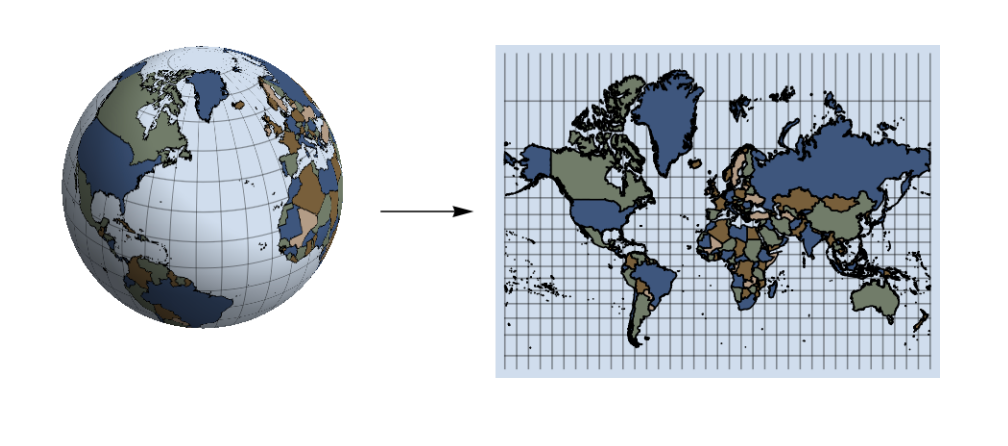

Sources: Robinson et al., 1995; Snyder, John P. 1987, https://marksmath.org/classes/common/MapProjection.pdf


Since the Earth is not flat, we need a way to represent its curved surface on a flat map. This process is called a map projection.

A map projection is a systematic representation of all or part of the surface of a round body, especially the Earth, on a plane.

<img src="http://2012books.lardbucket.org/books/geographic-information-system-basics/section_06/8c5c63aacfa3743ed4962745a77d782c.jpg" width="400">

## Why do we need map projections?

Having a very high resolution globe in your backyard/living room is not very practical.

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e2/Globe_at_the_Vancouver_Convention_Centre.JPG" width="400">

Plus, its much easier to handle a plane (i.e., 2d array) than the surface of a sphere (or worse an ellipsoid). 


# You can't have your cake and eat it too

* Projecting from the globe to a plane cannot be done without distortion in shape, area, distance, or direction.

* There are an infinite number of map projections. 

* Different map projections have different strengths and weakneeses.

* There is no **one** map projection.


## Key Properties of Map Projections

Different projections preserve different properties of the Earth's surface. The four key properties to consider when choosing a projection are:

1. **Conformal**: Preserves shape but distorts area.
   - Example: **Mercator projection**, used for navigation.
2. **Equal-area**: Preserves area but distorts shape.
   - Example: **Albers Equal-Area**, used for thematic maps comparing spatial distributions.
3. **Equidistant**: Preserves distances from a certain point or along specific lines.
   - Example: **Equirectangular projection**, often used for simple mapping.
4. **Azimuthal (Direction-preserving)**: Maintains accurate directions from a central point.
   - Example: **Lambert Azimuthal Equal-Area**, useful for mapping hemispheres.

Additionally, **compromise projections** (e.g., Robinson, Winkel Tripel) attempt to minimize overall distortion, making them popular for world maps.

Choosing the right projection depends on the purpose of the map. In the next sections, we will explore different types of projections in more detail.

## Types of Map Projections

Map projections can be classified into different types based on the geometric surface onto which the Earth's surface is projected. The three main types are:

1. **Cylindrical Projections**: The Earth's surface is projected onto a cylinder.
   - Best for **world maps** and **navigation**.
   - Example: **Mercator projection** (preserves direction but distorts area).
   - Distortion: Minimal near the equator, but severe near the poles.

2. **Conic Projections**: The Earth's surface is projected onto a cone.
   - Best for **mid-latitude regions** (e.g., USA, Europe).
   - Example: **Albers Equal-Area** (preserves area but distorts shape).
   - Distortion: Minimal along standard parallels, increasing further away.

3. **Azimuthal (Planar) Projections**: The Earth's surface is projected onto a flat plane.
   - Best for **polar regions** and **air route navigation**.
   - Example: **Lambert Azimuthal Equal-Area** (preserves area, used for hemispheres).
   - Distortion: Minimal at the center, increasing outward.

Each projection type has specific advantages and trade-offs, which will be discussed in detail in the following sections.


# Common developable surfaces

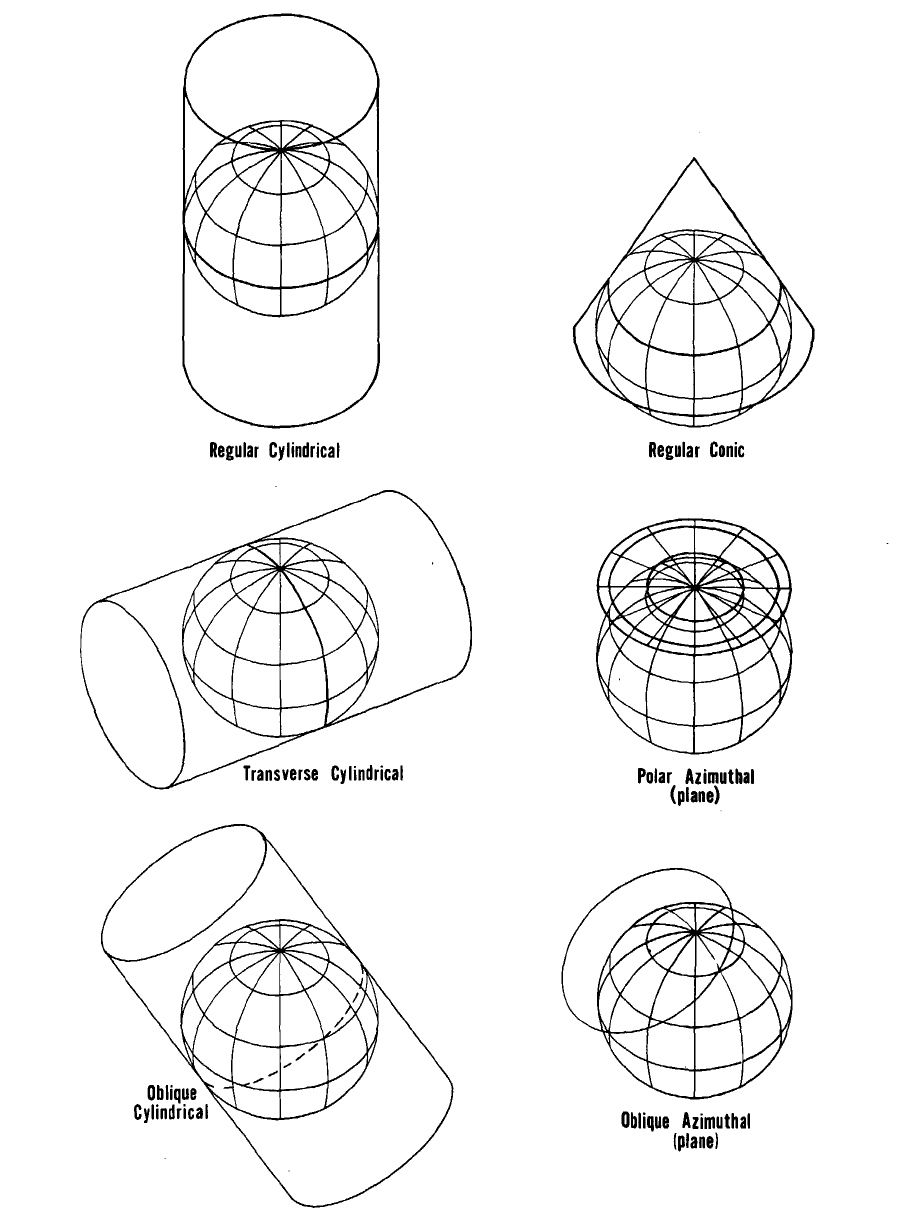

* There are other developable surfaces such as the pseudo-cylindrical one.
* The type of developable surface, the orientation of the surface with respect to the Earth's axis, and how the surface intersects the globe leads to many map projections.


# Tissot's indicatrix deformation map

This map enables a way to visually illustrate the angular and areal distortions in a map projection.

### Unprojected globe

<img src="https://map-projections.net/img/figs/orthographic-tissot-big.jpg" width="600">

### Mercator projection


<img src="https://map-projections.net/img/figs/mercator-tissot-big.jpg" width="600">

Source: map-projections.net


# Characteristics of map projections

The characteristics of a given map projections is what leads to choosing one map projection over another.

# Map projection characteristic: Area

An ***equal area projection*** is a map projection that shows regions that are the same size on the Earth as the same size on the map but may distort the shape, angle, and/or scale.

### Example: Cylindrical equal area projection

- **Preserves area**: Ensures that the relative sizes of regions are accurate.
- **Distorts shape**: Shapes appear increasingly flattened or stretched away from the equator.
- **Straight meridians and parallels**: Like all cylindrical projections, latitude and longitude lines are straight and perpendicular.
- **Distortion pattern**: Shape distortion increases towards the poles.


<img src="https://upload.wikimedia.org/wikipedia/commons/7/76/Cylindrical_equal-area_projection_SW.jpg" width="700">

* #### Tissot's Indicatrix of deformation

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Tissot_indicatrix_world_map_Lambert_cyl_equal-area_proj.svg/2880px-Tissot_indicatrix_world_map_Lambert_cyl_equal-area_proj.svg.png" width="700">


#### **Use Cases:**
- **Global statistical maps** (e.g., population density, climate zones).
- **Social and educational mapping** to emphasize area equality.
- **Environmental and oceanographic studies** where size accuracy is crucial.

# Map projection characteristic: Shape

A ***conformal projection*** aims to ensure that the relative local angles around every point on the map are shown correctly. Although a large area must still be shown distorted in shape, its small features are shaped generally correct.

### Example: Mercator projection

- **Preserves angles and shapes** (conformal).
- **Distorts area**, making regions near the poles appear much larger than they are.
- Used primarily for **navigation**, as it preserves straight-line directions (rhumb lines).
- **Criticism**: Exaggerates the size of high-latitude regions (e.g., Greenland appears as large as Africa).
- **Alternatives**: **Gall-Peters, Equal-Area projections** offer more accurate size representation.


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/73/Mercator_projection_Square.JPG/700px-Mercator_projection_Square.JPG" width="700">

* #### Tissot's Indicatrix of deformation

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Mercator_with_Tissot%27s_Indicatrices_of_Distortion.svg/700px-Mercator_with_Tissot%27s_Indicatrices_of_Distortion.svg.png" width="700">

### **Use Cases for the Mercator Projection**
The **Mercator Projection** is widely used despite its area distortion. It is particularly useful for navigation and web mapping.


#### **Key Use Cases:**
- **Maritime and Air Navigation**: Preserves **rhumb lines** (constant compass directions), used in **nautical and aviation charts**.
- **Web Mapping Services**: Straight meridians and parallels simplify **tile-based rendering** for seamless zooming.
- **Historical and Colonial Mapping**: Popular during the **Age of Exploration** for European maritime expansion. Led to **misconceptions about the relative size of continents**.


# Map projection characteristic: Scale

No map projections shows scale correctly throughtout the map. However, ***an equidistant projection*** shows true scale between one or two points and every other point on the map, or along every meridian. It is often used for **regional mapping** where distance measurements are important.

### Example: Equidistant conic projection

- **Preserves distances** along meridians and selected standard parallels.
- **Distorts shape and area**, especially away from the standard parallels.
- **Straight meridians converge at a single point** (usually beyond the mapped area).
- **Parallels are arcs**, with spacing that maintains equidistance properties.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d8/Equidistant_conic_projection_SW.JPG/500px-Equidistant_conic_projection_SW.JPG" width="700">

* #### Tissot's Indicatrix of deformation

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/43/Equidistant_Conic_with_Tissot%27s_Indicatrices_of_Distortion.svg/2560px-Equidistant_Conic_with_Tissot%27s_Indicatrices_of_Distortion.svg.png" width="700">

#### **Use Cases:**
- **Regional and national maps**: Used for **country-scale maps** where accurate distance measurements are needed.
- **Aeronautical and road maps**: Helps in **distance estimation** along specific routes.
- **Weather and climate maps**: Often applied in **meteorological mapping** to show patterns over mid-latitude regions.
- **Mapping mid-latitude areas**: Works best for regions with an **east-west extent** (e.g., the United States, Europe).

This projection is useful when accurate **distance representation** is needed while balancing distortion across larger areas.

# Map projection characteristic: Direction 

An ***azimuthal projection*** ensures that directions or azimuths of all points on the map are shown correctly with respect to the center.

### Example: Azimuthal equidistant projection

- **Preserves true distances** from the central point to any other location.
- **Distorts shape and area**, especially toward the edges of the map.
- **Radial symmetry**, with meridians appearing as straight lines radiating from the center.
- **Commonly centered on a specific location**, such as a city or country.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Azimuthal_equidistant_projection_SW.jpg/1280px-Azimuthal_equidistant_projection_SW.jpg" width="700">

* #### Tissot's Indicatrix of deformation

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7c/Azimuthal_Equidistant_with_Tissot%27s_Indicatrices_of_Distortion.svg/600px-Azimuthal_Equidistant_with_Tissot%27s_Indicatrices_of_Distortion.svg.png" width="700">

#### **Use Cases:**
- **Aviation & Radio Communication** – Used for flight route planning and radio signal coverage.
- **United Nations Emblem** – Represents global inclusivity with equal distances.
- **Seismic & Disaster Mapping** – Shows earthquake epicenters and tsunami propagation.
- **City-Centered Maps** – Displays distances from capitals or military bases for planning.

# So why don't we just find a projection that meets all these criteria?

It is possible to find projections that combine multiple characteristics. However, a map projection can never be both equal-area and conformal at the same time. You can find a "sweet-spot" but both conditions will never be perfectly met at the same time. 

## A rectangle under a conformal transformation

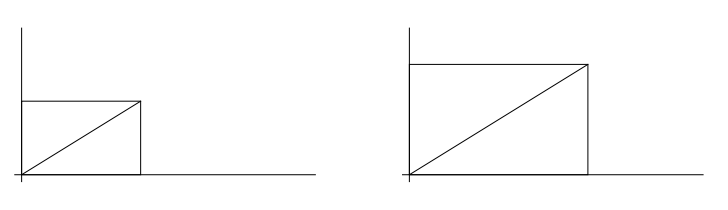

In order for a transformation to be conformal, it must scale equally in the horizontal and vertical directions.

## A rectangle under an equal area transformation

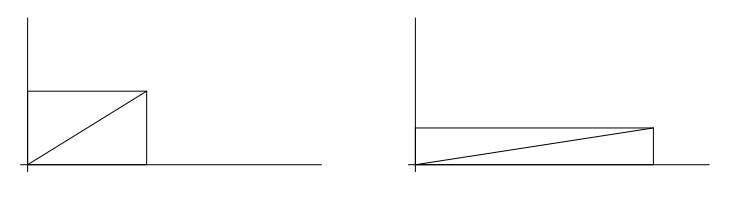

In order for a transformation to be area preserving, the horizontal and vertical scaling factors must be reciprocals of one another

Credit: https://marksmath.org/classes/common/MapProjection.pdf

# How do I choose a projection?

In [ ]:
%%html
<iframe width="1200" height="800" src="https://projectionwizard.org/" frameborder="0" allow="accelerometer;  autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe> 

# Parameters of a Map Projection

Map projections require several **defining parameters** that influence distortion and accuracy. These include:

- **Ellipsoid**: Defines the reference shape of the Earth (e.g., **WGS84**).
- **Standard Parallels/Meridians**: Lines where the **projection surface intersects the ellipsoid**.
  - **Tangent projections** (single intersection) have **one** standard parallel/meridian.
  - **Secant projections** (two intersections) have **two** standard parallels/meridians, reducing distortion between them.
  - **Less distortion occurs near standard lines**; distortion increases further away.
- **Central Meridian**: Defines the **central longitude** of the projection, typically the **reference for east-west positioning**.
- **Latitude of Origin**: The **central latitude** of the projection, influencing how features are centered.
- **Other Parameters**: Additional settings may define scale, false easting/northing, and projection-specific adjustments.


# The Ellipsoid

The Earth is **not a perfect sphere** but an **oblate ellipsoid**, meaning it is slightly flattened at the poles due to **centrifugal forces** caused by its rotation.

- The **degree of flattening** is given by:

  $$
  f = \frac{a - b}{a}
  $$

  where:
  - $ a $ = **Equatorial radius** (semi-major axis),
  - $ b $ = **Polar radius** (semi-minor axis).

- Modern satellite measurements show:

  $$
  f \approx \frac{1}{298}
  $$

- This flattening affects **geodetic calculations**, requiring ellipsoidal models for accurate mapping and positioning.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/WGS84_mean_Earth_radius.svg/1280px-WGS84_mean_Earth_radius.svg.png" width="400">


# Historical Earth Ellipsoids

In [ ]:
%%html
<iframe width="939" height="528" src="https://en.wikipedia.org/wiki/Earth_ellipsoid#Historical_Earth_ellipsoids" frameborder="0" allow="accelerometer;  autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe> 

The WGS-84 ellipsoid remains the go-to ellipsoid to this day. 

# Understanding Map Projection Transformations and Raster Data Challenges

A **map projection** transforms geographic coordinates (**latitude, longitude**) from a **sphere** (or ellipsoid) to a **flat map** (e.g., Mercator projection). While this transformation is mathematically defined, it introduces distortions that can create **one-to-many** and **many-to-one** problems, especially for raster data.

#### **Key Concepts:**
1. **One-to-One Mapping (Ideal Case)**
   - When projecting from the sphere to a map, a perfect one-to-one relationship means each point on the sphere maps **exactly** to one point on the projected surface.
   - Some projections maintain this for certain regions (e.g., near standard parallels or central meridians).

2. **One-to-Many Mapping (Distortion Issue)**
   - In some projections, a **single point** on the sphere may be mapped to **multiple points** on the projected surface.
   - Example: The **poles in the Mercator projection** stretch infinitely, meaning multiple locations could map to undefined or highly distorted areas.

3. **Undefined Mappings**
   - Some locations cannot be projected at all in certain projections.
   - Example: The **poles are undefined** in Mercator because latitude **90° cannot be represented**.

4. **Challenges with Raster Data**
   - **Raster data (gridded spatial data)** consists of pixels covering areas.
   - When reprojecting, grid cells do not align perfectly, causing:
     - **Data loss** (many-to-one issue, where multiple pixels merge into one).
     - **Data duplication** (one-to-many issue, where a single pixel spreads across multiple new locations).
   - This makes error-free **round-trip** transformations impossible.

#### **Why Does This Matter?**
- **Vector data (points, lines, polygons)** can be reprojected without loss, since it is mathematically defined.
- **Raster data cannot be perfectly reprojected back and forth** because pixel values depend on **resampling** methods (e.g., nearest neighbor, bilinear, cubic interpolation).
- Understanding these limitations helps in **choosing appropriate projections** and **minimizing distortions** for spatial analysis. 

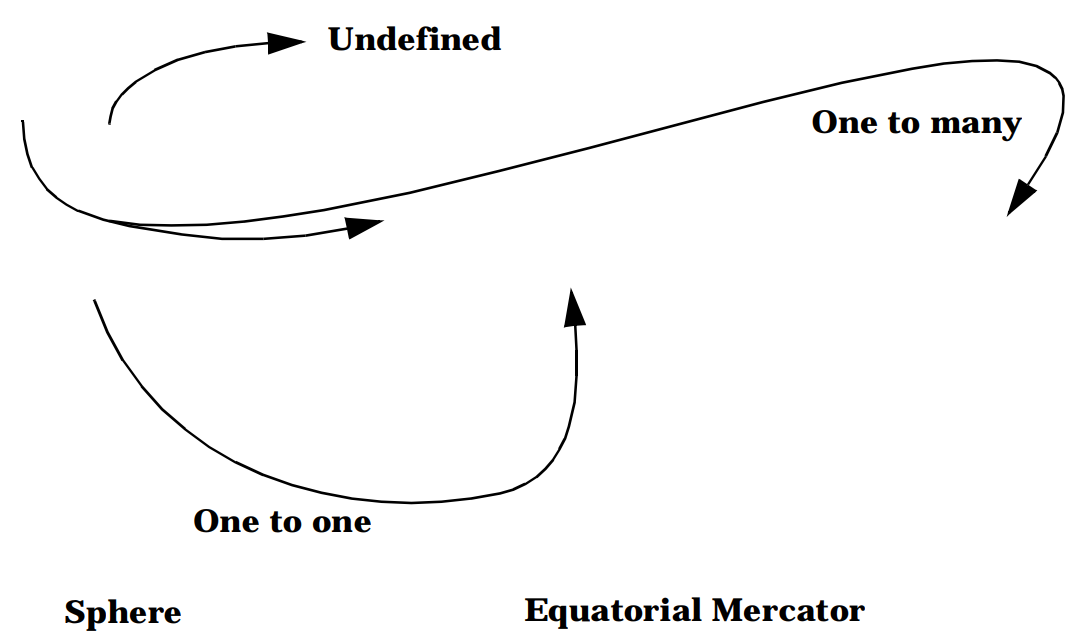

- **One-to-One:** Ideal transformation.
- **One-to-Many:** A single point on the sphere gets mapped to multiple points in projection.
- **Undefined:** Some points cannot be mapped in specific projections.
- This explains why **raster reprojection is lossy**, making perfect back-and-forth conversions impossible.

# Standard parallels

Lines at which there is no distortion in the map projection. Standard parallels are used in both conical and cylindrical projections.

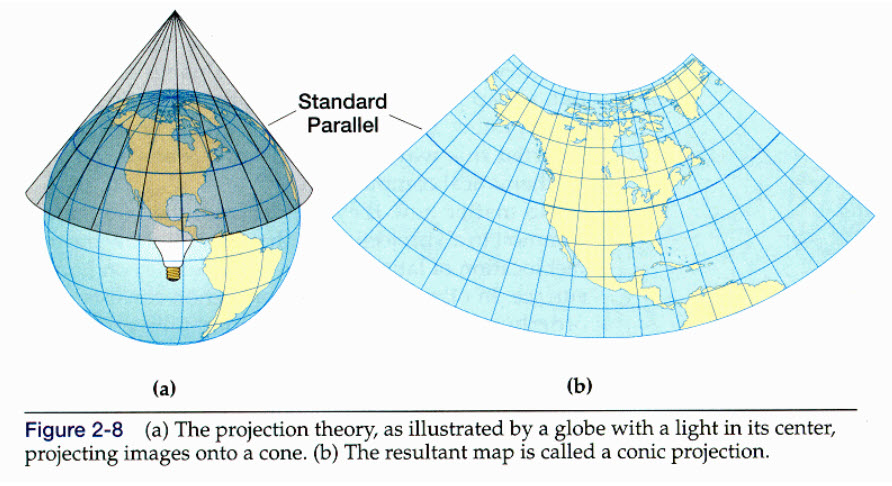

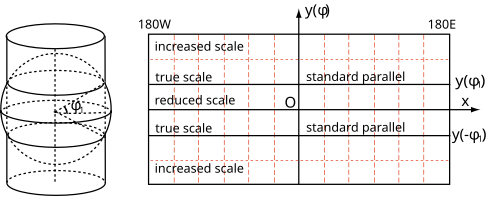


# Under the hood: Examples of the forward and backward transformations

# Mercator projection (Sphere assumption)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/73/Mercator_projection_Square.JPG/700px-Mercator_projection_Square.JPG" width="700">

### Forward transformation

$$x = R_e(\lambda - \lambda_0)$$
$$y = \left(R_e/2\right)\ln \left(\frac{1 + \sin \phi}{1 - \sin \phi}\right) $$

### Backward transformation

$$\phi = \pi/2 - 2 \arctan(e^{-y/R_e})$$
$$\lambda = x/R_e + \lambda_0$$

Where $R_e$ is the radius of Earth, $\phi$ is latitude, $\lambda$ is longitude, $x$ is the horizontal coordinate in the map projection, $y$ is the vertical coordinate in the map projection, and $\lambda_0$ is the central meridian (i.e., longitude) of the projection.

**Important**: These functions are only applicable when assuming that the Earth is a perfect sphere. Other more complicated transformations are necessary for the ellipsoid. 

# Cylindrical equal area projection (Sphere assumption)

<img src="https://upload.wikimedia.org/wikipedia/commons/7/76/Cylindrical_equal-area_projection_SW.jpg" width="700">

### Forward transformation

$$x = R_e(\lambda - \lambda_0)\cos \phi_s$$
$$y = R_e\frac{\sin\phi}{\cos\phi_s}$$

### Backward transformation

$$\phi = \arcsin\left[\frac{y \cos\phi_s}{R_e}\right]$$
$$\lambda = \frac{x}{R_e \cos \phi_s} + \lambda_0$$

Where $R_e$ is the radius of Earth, $\phi$ is latitude, $\lambda$ is longitude, $x$ is the horizontal coordinate in the map projection, $y$ is the vertical coordinate in the map projection, $\lambda_0$ is the central meridian (i.e., longitude) of the projection, and $\phi_s$ is the standard parallel.

# Albers equal-area conic projection (Sphere assumption)

<img src="https://upload.wikimedia.org/wikipedia/commons/1/1f/Albers_projection_SW.jpg" width="700">

### Forward transformation

$$n = (\sin \phi_1 + \sin \phi_2)/2$$
$$C = \cos^2 \phi_1 + 2n \sin\phi_1$$
$$\rho = \frac{R_e}{n}\sqrt{C - 2n \sin \phi}$$
$$\rho_0 = \frac{R_e}{n}\sqrt{C - 2n \sin \phi_0}$$
$$\theta = n(\lambda - \lambda_0)$$
$$x = \rho \sin \theta$$
$$y = \rho_0-\rho \cos \theta$$

### Backward transformation

$$\rho = \sqrt{x^2 + (\rho_0 - y)^2}$$
$$\theta = \arctan \frac{x}{\rho_0 -y}$$
$$\phi = \arcsin \frac{C - \left(\frac{\rho n}{R_e}\right)^2}{2n}$$
$$\theta = \arctan \frac{x}{\rho_0 - y}$$

Where $R_e$ is the radius of Earth, $\phi$ is latitude, $\lambda$ is longitude, $x$ is the horizontal coordinate in the map projection, $y$ is the vertical coordinate in the map projection, $\lambda_0$ is the central meridian (i.e., longitude) of the projection, and $\phi_1$ and $\phi_2$ are the standard parallels.

Fortunately for us, there is a lot of software out there that reprojects for us. 

* Cartopy allows us to just reproject on the fly while making a projection
* GDAL is a large library that allows us to reproject, regrid, cut... (we will cover it on Thursday)
* QGIS
* And yes, ArcGIS
* ...

# Let's go back to Cartopy's projections

In [ ]:
%%HTML
<iframe width="939" height="528" src="https://scitools.org.uk/cartopy/docs/latest/reference/index.html" frameborder="0" allow="accelerometer;  autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

# Example: Robinson's projection

In [ ]:
img_extent = (-180,180,-90,90)
fig = plt.figure(figsize=(14,6))
#Define a new target projection
central_longitude = -180
#Target projection
ax = plt.axes(projection=cartopy.crs.Robinson(central_longitude=central_longitude))
#Source projection
plt.imshow(dem,transform=cartopy.crs.PlateCarree(),cmap=plt.get_cmap('terrain'),extent=(img_extent))
plt.xticks([])
plt.yticks([])
cb = plt.colorbar(ax=ax,orientation='horizontal',shrink=0.6,pad=0.03)
cb.ax.tick_params(labelsize=20)
plt.title('Elevation (m)',fontsize=25)
plt.show()

# Map projections are fun! 

There is **a lot** more that you can learn about projections. Please see the [*Map Projections - A Working Manual*](https://pubs.usgs.gov/pp/1395/report.pdf) if you want to learn more.


<img src="https://imgs.xkcd.com/comics/map_projections.png" width="600">